# Market share forecast of battery electrical vehicles
*by Roald Ruiter, 7 April 2019.*

Recently I came across an article in the *Nederlands Tijdschrift voor Natuurkunde* (Dutch Journal of Physics) titled *Waarom wij wel zonnepanelen maar nog geen kernfusiestroom hebben* (Why we have solar panels but no nuclear fusion power) by Niek Lopes Cardozo, Guido Lange and Gert Jan Kramer (NTvN 83, October 2017, page 350-354). In this article they use a relatively simple model to forecast the total installed wind and solar power. I decided to do a similar analyses for the electric vehicle market.

## tl;dr Results
The earliest at which all vehicles in the world can be replaced by electrical ones is **2043**. That is assuming all vehicles which were in the world at 2014 will be replaced by electric vehicles and assuming a lifetime of a car of 20 years. 

## tl;dr Model
The quickest way to go from point A (no electric cars) to B (all vehicles are electric) is a straight line. Since you can not all of the sudden produce an amount of electrical vehicles equal to the entire demand of new vehicles, a supply chain for the electric vehicle market has to be build up. Therefore three phases are identified in the model:
1. An _exponential_ growth phase during which the supply chain is build up until its output matches the rate at which products are replaced (as determined by the product lifetime).
2. A _linear_ growth phase during which all old products are steadily replaced by newer counterparts.
3. The _saturation_ phase where the total number of products does not change anymore.

###  More information on the model
The article by Niek Lopes Cardozo, Guido Lange and Gert Jan Kramer in the Dutch Journal of Physics is based on two previous articles of the authors. The one which is not behind a paywall, is called [‘The cradle of new energy technologies. Why we have solar cells but not yet nuclear fusion?’](http://www.shell.com/energy-and-innovation/the-energy-future/colours.html#vanity-aHR0cDovL3d3dy5zaGVsbC5jb20vY29sb3Vycw), published on December 2015 in ‘The colours of energy. Essays on the future of energy and society’.   

### Model in Python
I made a `Forecast` class in Python which I import using `from forecast import Forecast` in order to use its contents. If you want to know the details of the Python script/model, have a look at the file `forecast.py`. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from forecast import Forecast
from scipy import optimize

## Input data

I decided to do an analyses *only* on battery electric vehicles and not include plug-in hybrids, since they are a half-way solution in my opinion. The data was obtained from the [Global EV Outlook 2017](https://www.iea.org/publications/freepublications/publication/GlobalEVOutlook2017.pdf). Specifically Table 5 on page 49.

In [2]:
# Worldwide battery electric vehicles stock
EV_stock = np.array([
    1370.0,
    1690.0,
    2150.0,
    4540.0,
    7470.0,
    16420.0,
    55160.0,
    112940.0,
    226780.0,
    420330.0,
    745610.0,
    1208900.0,
    # 2017 data from: Table A.2, page 108
    # https://webstore.iea.org/download/direct/1045?fileName=Global_EV_Outlook_2018.pdf 
    1928360,
    # 2018 data from:, 
    # https://www.zsw-bw.de/en/media-center/data-service.html#c6700
    # 61% from BEV share in 2017, from Global EV Outlook 2018
    5610000 * 0.61,
])
stock_years = np.array([year for year, _ in enumerate(EV_stock, 2005)])

Other than that, only two more parameters are required for the model: the market saturation value and the lifetime of vehicles. For the market saturation value I assume all vehicles will be replaced by battery electric ones. In 2014 the amount of vehicles in the world was around [1.2 billion](https://en.wikipedia.org/wiki/Motor_vehicle#cite_note-USeDataBook30-11) ($1.2 \times 10^9$). For the moment I will assume this value.

Then on the lifetime of a vehicle. Currently the average lifetime of a vehicle (after which it is demolished) in the Netherlands is [18 years](https://www.cbs.nl/nl-nl/nieuws/2016/20/personenauto-s-steeds-ouder). Since current vehicles have a longer lifetime than in the past, I will use 20 years.

In [3]:
ev_forecast = Forecast(EV_stock, stock_years, saturation=1.2e9, tau_life=20)
ev_forecast.set_plot_labels(
    'Year', 'Stock',
    'Worldwide stock of battery electric vehicles'
)

## Determining the growth rate and transition time

By fitting our input data we can determine the *growth rate* and the *transition time* at which the growth transitions from an exponential to a linear one. The fit is done under the assumption that the input data is all from the exponential growth phase.

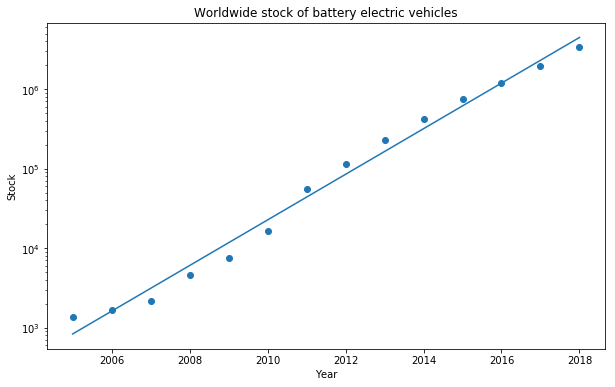

The growth rate is 1.51 years and the transition year is 2023.
The meaning of the growth rate is that each 1.51 years the amount of electric vehicles grows by a factor of exp(1) = 2.72


In [4]:
ev_forecast.plot_exponential_phase(figsize=(10,6))

growth_rate = float(ev_forecast.tau_exp)
print('The growth rate is {:.2f} years and the transition year is {}.'
      .format(growth_rate, ev_forecast.get_transistion_year()))
print('The meaning of the growth rate is that each {:.2f} years the amount of '
      'electric vehicles grows by a factor of exp(1) = 2.72'
      .format(growth_rate))

## All growth phases

We can then also show the linear growth phase and the saturation.

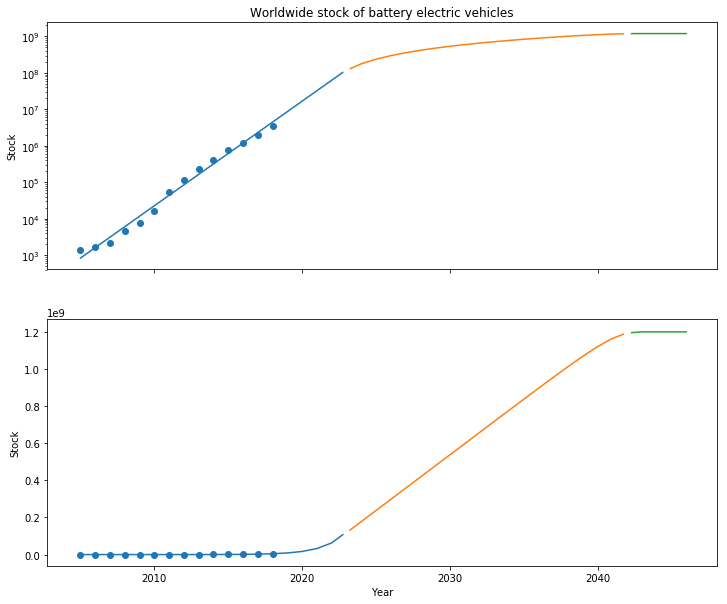

The earliest at which all vehicles can be replaced by electrical ones is 2043.


In [5]:
ev_forecast.plot_all_phases(figsize=(12,10))

print('The earliest at which all vehicles can be replaced '
      'by electrical ones is {}.'
     .format(ev_forecast.get_saturation_year()))

## Other scenarios 

What if:
1. the total amount of vehicles which should be replaced is larger than the current 1.2 billion, say 3 billion? 
2. Or what if the vehicle lifetime is longer, say 30 years? 
3. Or both?

In [6]:
for saturation, lifetime in [(3e9, 20), (1.2e9, 30), (3e9, 30)]:
    ev_forecast = Forecast(EV_stock, stock_years, saturation=saturation, tau_life=lifetime)
    print('Replacing {} billion vehicles, assuming a car lifetime of {} years, '
          'can be done by {}.'
          .format(saturation/1e9, lifetime, ev_forecast.get_saturation_year()))
    

Replacing 3.0 billion vehicles, assuming a car lifetime of 20 years, can be done by 2044.
Replacing 1.2 billion vehicles, assuming a car lifetime of 30 years, can be done by 2052.
Replacing 3.0 billion vehicles, assuming a car lifetime of 30 years, can be done by 2053.


# Conclusions 

Assuming all vehicles will be replaced by electric ones, we have around 4 years of exponential growth of the electrical vehicle market in front of us. Around 2023 linear growth will set in and gradually all internal combustion vehicles will be replaced by electrical ones which will be done by *2044*. Note that although the growth of the market seems impressive on the logarithmic plot, on a linear scale you can see that the electric vehicle market is still very small in 2018 ($\frac{3.4 \times 10^6}{1.2 \times 10^9} 100 \% = 0.28 \%$).

Also note that the car lifetime has the largest effect on when all vehicles can be replaced. It would for example be possible to replace all vehicles earlier than 2044, by artificially lowering the lifetime of a car. In other words, incentivize people to demolish their cars and buy and electric one.